## Main Objective

The main objective of this analysis is to develop a predictive model that classifies cars based on their evaluation ratings (unacc, acc, good, vgood) using the attributes from the UCI Car Evaluation dataset. This model will focus on prediction, specifically forecasting the overall car evaluation based on factors such as buying price, maintenance cost, safety, and other relevant features.

By leveraging machine learning techniques, the analysis aims to provide valuable insights that can support decision-making for businesses in the automobile industry. Stakeholders, including car manufacturers, dealerships, and customers, can benefit from this analysis by gaining a clearer understanding of the key factors influencing car evaluations. Additionally, the predictive model can be used to guide inventory decisions, pricing strategies, and marketing efforts, ultimately helping businesses to optimize their offerings and better meet customer preferences.

## Dataset Description

The UCI Car Evaluation dataset consists of 1,728 instances, each representing an evaluation of a car based on various attributes. The dataset contains categorical data that describes different aspects of automobiles, such as buying price, maintenance cost, the number of doors, the number of persons the car can accommodate, the size of the luggage boot, and the car’s safety rating. Each instance is labeled with an evaluation category (unacc, acc, good, or vgood), representing the overall evaluation of the car.

### Summary of Attributes:

Buying: Price of the car (low, med, high, vhigh).
Maintenance: Cost of maintaining the car (low, med, high, vhigh).
Doors: Number of doors in the car (2, 3, 4, 5more).
Persons: Capacity of persons the car can accommodate (2, 4, more).
Lug_boot: Size of the luggage boot (small, med, big).
Safety: Safety rating of the car (low, med, high).
Class: Overall car evaluation (unacc, acc, good, vgood).

In [15]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
X.head(5)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


## Data Exploration and Preprocessing

### Data Exploration
We began by reviewing the general structure of the dataset using methods such as df.info(), which provides a concise summary of the dataset, including the number of non-null entries for each column. This allowed us to quickly identify columns that potentially contained missing data.
To pinpoint the exact number of missing values in each column, df.isnull().sum() method is utilized. This gave us a clear count of the missing values for each feature in the dataset, helping us assess the extent of the missing data.

### Data Visualization
In addition to numerical summaries, we used graphical representations to visualize the distribution of missing values. Libraries like matplotlib or seaborn were employed to create heatmaps or bar plots, making it easier to spot patterns or systematic missingness across columns.

### Data Preprocessing
As part of the data preprocessing process, addressed the need to encode categorical variables in a way that captures the inherent ordinal relationships within the data. This is particularly important when the categories have a clear ranking or order, such as pricing or safety levels. To achieve this, OrdinalEncoder was employed from sklearn.preprocessing. The OrdinalEncoder was then initialized with the predefined categories for each feature. This ensured that each category was encoded according to its specific order.

In [65]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   buying    1728 non-null   float64
 1   maint     1728 non-null   float64
 2   doors     1728 non-null   float64
 3   persons   1728 non-null   float64
 4   lug_boot  1728 non-null   float64
 5   safety    1728 non-null   float64
 6   class     1728 non-null   float64
dtypes: float64(7)
memory usage: 94.6 KB
None
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [59]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


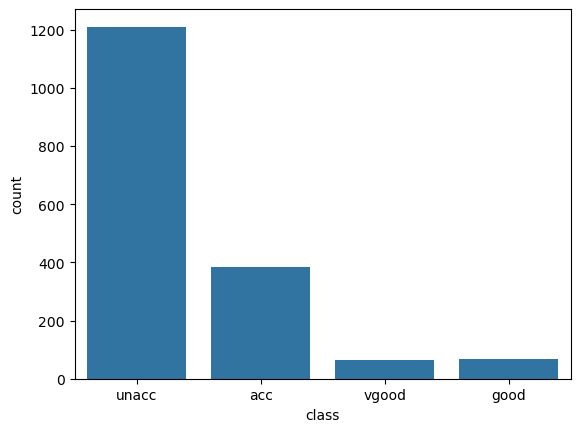

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Example: Visualizing the target class distribution
sns.countplot(x='class', data=df)
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder
buying_order = ['low', 'med', 'high', 'vhigh']
maintenance_order = ['low', 'med', 'high', 'vhigh']
lug_boot_order = ['small', 'med', 'big']
safety_order = ['low', 'med', 'high']
doors_order = ['2', '3', '4', '5more']  # Treat '5more' as the highest number of doors
persons_order = ['2', '4', 'more'] # Treat 'more' as the highest of persons
class_order = ['unacc', 'acc', 'good', 'vgood']

ordinalEncoder = OrdinalEncoder(categories = [buying_order, maintenance_order, lug_boot_order, safety_order, doors_order, persons_order, class_order])

df[['buying', 'maint', 'lug_boot', 'safety', 'doors', 'persons', 'class']] = ordinalEncoder.fit_transform(df[['buying', 'maint', 'lug_boot', 'safety', 'doors', 'persons', 'class']])

print(df.head())

   buying  maint  doors  persons  lug_boot  safety  class
0     3.0    3.0    0.0      0.0       0.0     0.0    0.0
1     3.0    3.0    0.0      0.0       0.0     1.0    0.0
2     3.0    3.0    0.0      0.0       0.0     2.0    0.0
3     3.0    3.0    0.0      0.0       1.0     0.0    0.0
4     3.0    3.0    0.0      0.0       1.0     1.0    0.0


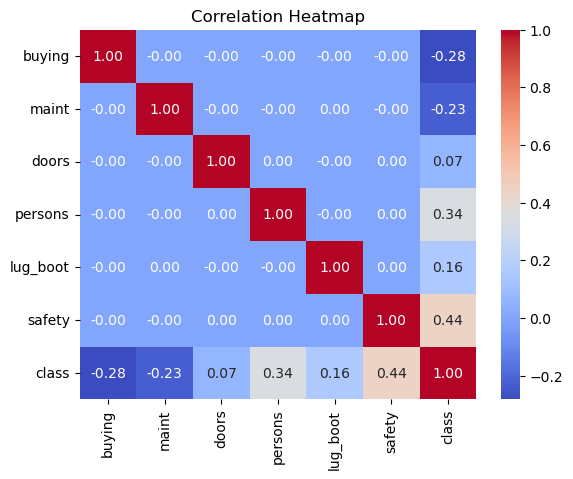

In [11]:
import seaborn as sns
import pandas as pd

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Logistic Regression

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features = df.drop('class', axis=1)
target = df['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 81.21%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       235
         1.0       0.67      0.55      0.61        83
         2.0       0.67      0.36      0.47        11
         3.0       0.76      0.76      0.76        17

    accuracy                           0.81       346
   macro avg       0.74      0.65      0.68       346
weighted avg       0.80      0.81      0.80       346



## Decision Tree

Accuracy: 96.53%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       235
         1.0       0.97      0.90      0.94        83
         2.0       0.56      0.91      0.69        11
         3.0       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346



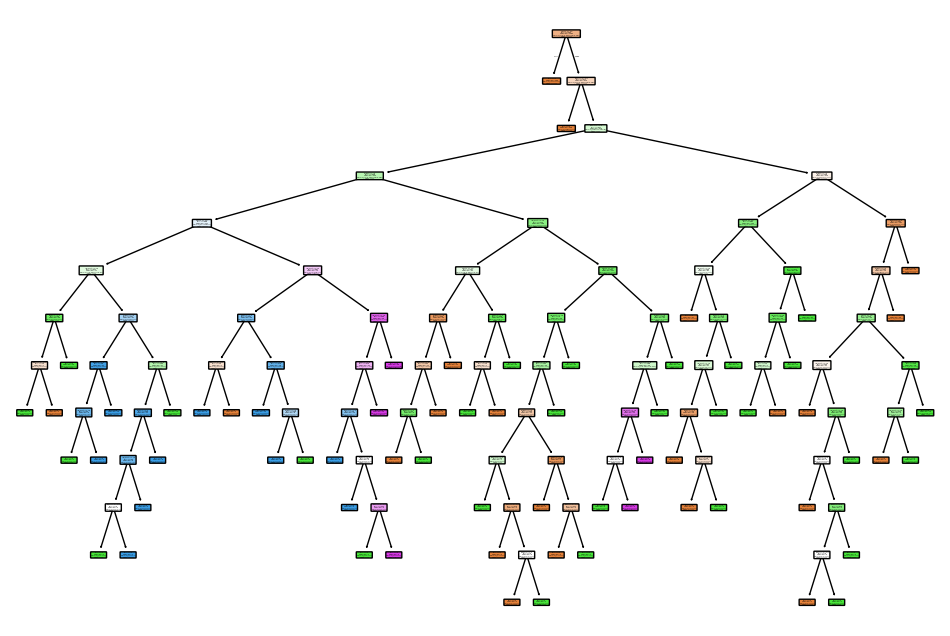

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=class_order, rounded=True)
plt.savefig("decision_tree_plot.png", format="png")


## Random Forest Classifier

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=120, max_depth=9, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 96.82%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       235
         1.0       0.97      0.90      0.94        83
         2.0       0.59      0.91      0.71        11
         3.0       0.94      0.88      0.91        17

    accuracy                           0.97       346
   macro avg       0.87      0.92      0.89       346
weighted avg       0.97      0.97      0.97       346



## Conclusion from results
Based on the results of the three classifiers, I recommend using the Random Forest model as the final model for this task. While the Decision Tree model also performs well with an accuracy of 96.53%, the Random Forest slightly outperforms it with an accuracy of 96.82%, making it the most accurate model. Additionally, the Random Forest's precision, recall, and F1-scores across all classes are very similar to those of the Decision Tree, with the added benefit of improved performance due to the ensemble nature of the Random Forest.

In terms of explainability, the Decision Tree is more straightforward, allowing for easy visualization of decision-making processes, but this comes at the cost of reduced accuracy compared to Random Forest. The Random Forest, although less interpretable due to its ensemble nature, still offers reasonable interpretability at a higher accuracy level, especially if tools like feature importance are utilized.

Thus, for the best combination of accuracy and generalization, the Random Forest is recommended as the final model. However, if model interpretability is a priority, and the slight drop in accuracy is acceptable, the Decision Tree can be considered.

## Key Findings and Insights

### Model Performance:

Logistic Regression had the lowest accuracy (81.21%) compared to the other models. It performed well for some classes but struggled with less common classes, like class 2.0, where it had a much lower recall and precision.

Decision Tree performed better, achieving an accuracy of 96.53%. It did a great job of classifying the majority of the classes, but still had some issues with certain rare classes.

Random Forest was the best-performing model, with an accuracy of 96.82%. This model, which combines many decision trees, showed the best balance between accuracy and reliability, performing well across all classes, including rare ones.

### Key Drivers of the Model:

The most important factors influencing the model's predictions are likely the features related to buying price, maintenance cost, and safety. These features help the model decide whether a car is acceptable or not.

Safety seemed to play a major role in distinguishing between different classes, especially for more expensive or safer cars. These features helped the models make accurate decisions, especially when classes were more clearly separated based on features like price and safety.

## Next Steps and improvements

#### Cross-Validation:

Implementing cross-validation (e.g., 5-fold or 10-fold cross-validation) would provide a more robust evaluation of the model by ensuring that it performs well across different subsets of the data. This would help avoid overfitting to a specific train-test split and give a clearer picture of model performance.

#### Add New Features

Interaction Features: Combining features like "buying" and "maintenance" could help capture more complex relationships. For instance, cars with both "high" maintenance and "low" buying costs may need special handling.

Price and Fuel Efficiency: If features like the car's price or fuel efficiency are available, they might help the model make more accurate predictions.